In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import style
style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
netflix = pd.read_csv('netflix daily top 10.csv')
netflix.head(10)

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
0,2020-04-01,1,1,1,"Tiger King: Murder, Mayhem …",TV Show,Yes,"Mar 20, 2020",9,90
1,2020-04-01,2,2,-,Ozark,TV Show,Yes,"Jul 21, 2017",5,45
2,2020-04-01,3,3,2,All American,TV Show,NaN,"Mar 28, 2019",9,76
3,2020-04-01,4,4,-,Blood Father,Movie,NaN,"Mar 26, 2020",5,30
4,2020-04-01,5,5,4,The Platform,Movie,Yes,"Mar 20, 2020",9,55
5,2020-04-01,6,6,-,Car Masters: Rust to Riches,TV Show,Yes,"Sep 14, 2018",4,14
6,2020-04-01,7,10,-,Unorthodox,TV Show,Yes,"Mar 26, 2020",2,5
7,2020-04-01,8,7,5,Love is Blind,TV Show,Yes,"Feb 13, 2020",9,40
8,2020-04-01,9,8,-,Badland,Movie,NaN,"Mar 26, 2020",4,11
9,2020-04-01,10,9,-,Uncorked,Movie,Yes,"Mar 27, 2020",4,15


In [3]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7100 entries, 0 to 7099
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   As of                 7100 non-null   object
 1   Rank                  7100 non-null   int64 
 2   Year to Date Rank     7100 non-null   object
 3   Last Week Rank        7100 non-null   object
 4   Title                 7100 non-null   object
 5   Type                  7100 non-null   object
 6   Netflix Exclusive     4599 non-null   object
 7   Netflix Release Date  7100 non-null   object
 8   Days In Top 10        7100 non-null   int64 
 9   Viewership Score      7100 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 554.8+ KB


In [4]:
netflix.nunique()

As of                   710
Rank                     10
Year to Date Rank        11
Last Week Rank           11
Title                   645
Type                      4
Netflix Exclusive         1
Netflix Release Date    414
Days In Top 10          428
Viewership Score        779
dtype: int64

In [5]:
netflix.duplicated().sum()

0

### DATA CLEANING

In [6]:
netflix.drop('Netflix Exclusive', axis = 1, inplace=True)
netflix.head(10)

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Release Date,Days In Top 10,Viewership Score
0,2020-04-01,1,1,1,"Tiger King: Murder, Mayhem …",TV Show,"Mar 20, 2020",9,90
1,2020-04-01,2,2,-,Ozark,TV Show,"Jul 21, 2017",5,45
2,2020-04-01,3,3,2,All American,TV Show,"Mar 28, 2019",9,76
3,2020-04-01,4,4,-,Blood Father,Movie,"Mar 26, 2020",5,30
4,2020-04-01,5,5,4,The Platform,Movie,"Mar 20, 2020",9,55
5,2020-04-01,6,6,-,Car Masters: Rust to Riches,TV Show,"Sep 14, 2018",4,14
6,2020-04-01,7,10,-,Unorthodox,TV Show,"Mar 26, 2020",2,5
7,2020-04-01,8,7,5,Love is Blind,TV Show,"Feb 13, 2020",9,40
8,2020-04-01,9,8,-,Badland,Movie,"Mar 26, 2020",4,11
9,2020-04-01,10,9,-,Uncorked,Movie,"Mar 27, 2020",4,15


In [7]:
mode_title = netflix.Title.dropna().mode().iloc[0]
netflix.Title.replace(np.nan, mode_title, inplace = True)

In [8]:
netflix['Title'].fillna(netflix['Title'].mode().iloc[0], inplace=True)

In [9]:
mode_title = netflix['Title'].dropna().mode()
if not mode_title.empty:
    mode_title = mode_title.iloc[0]
    netflix['Title'].replace(np.nan, mode_title, inplace=True)
else:
    print("No mode found for 'Title' column.")

In [10]:
netflix = netflix.sort_values(by = 'Netflix Release Date')
netflix.head(10)

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Release Date,Days In Top 10,Viewership Score
6465,2022-01-07,6,7,-,The Longest Yard,Movie,"Apr 1, 2015",3,11
6519,2022-01-12,10,9,9,The Longest Yard,Movie,"Apr 1, 2015",8,26
6486,2022-01-09,7,7,-,The Longest Yard,Movie,"Apr 1, 2015",5,19
6496,2022-01-10,7,7,-,The Longest Yard,Movie,"Apr 1, 2015",6,23
6476,2022-01-08,7,6,-,The Longest Yard,Movie,"Apr 1, 2015",4,15
6456,2022-01-06,7,9,-,The Longest Yard,Movie,"Apr 1, 2015",2,6
6448,2022-01-05,9,-,-,The Longest Yard,Movie,"Apr 1, 2015",1,2
6508,2022-01-11,9,7,-,The Longest Yard,Movie,"Apr 1, 2015",7,25
36,2020-04-04,7,6,-,The Roommate,Movie,"Apr 1, 2020",3,13
35,2020-04-04,6,4,-,How to Fix a Drug Scandal,TV Show,"Apr 1, 2020",3,18


In [11]:
netflix.tail(10)

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Release Date,Days In Top 10,Viewership Score
1664,2020-09-14,5,5,-,Get Organized with The Home…,TV Show,"Sep 9, 2020",5,32
1686,2020-09-16,7,7,-,Cuties,Movie,"Sep 9, 2020",5,18
1684,2020-09-16,5,5,-,Get Organized with The Home…,TV Show,"Sep 9, 2020",7,44
1633,2020-09-11,4,4,-,Get Organized with The Home…,TV Show,"Sep 9, 2020",2,14
1676,2020-09-15,7,7,-,Cuties,Movie,"Sep 9, 2020",4,14
1674,2020-09-15,5,5,-,Get Organized with The Home…,TV Show,"Sep 9, 2020",6,38
1665,2020-09-14,6,7,-,The Social Dilemma,Movie,"Sep 9, 2020",4,13
1673,2020-09-15,4,6,-,The Social Dilemma,Movie,"Sep 9, 2020",5,20
1708,2020-09-18,9,8,4,Get Organized with The Home…,TV Show,"Sep 9, 2020",9,49
1683,2020-09-16,4,4,-,The Social Dilemma,Movie,"Sep 9, 2020",6,27


In [12]:
netflix['Last Week Rank']
netflix.head(5)

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Release Date,Days In Top 10,Viewership Score
6465,2022-01-07,6,7,-,The Longest Yard,Movie,"Apr 1, 2015",3,11
6519,2022-01-12,10,9,9,The Longest Yard,Movie,"Apr 1, 2015",8,26
6486,2022-01-09,7,7,-,The Longest Yard,Movie,"Apr 1, 2015",5,19
6496,2022-01-10,7,7,-,The Longest Yard,Movie,"Apr 1, 2015",6,23
6476,2022-01-08,7,6,-,The Longest Yard,Movie,"Apr 1, 2015",4,15


In [13]:
netflix['Last Week Rank'].replace('-', np.nan, inplace=True)
netflix['Last Week Rank'] = pd.to_numeric(netflix['Last Week Rank'], errors='coerce')  # Use 'errors' parameter to handle non-numeric values
mean_rank = round(netflix['Last Week Rank'].mean())  # Round the mean directly
netflix['Last Week Rank'].fillna(mean_rank, inplace=True)
netflix.head(5)

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Release Date,Days In Top 10,Viewership Score
6465,2022-01-07,6,7,4.0,The Longest Yard,Movie,"Apr 1, 2015",3,11
6519,2022-01-12,10,9,9.0,The Longest Yard,Movie,"Apr 1, 2015",8,26
6486,2022-01-09,7,7,4.0,The Longest Yard,Movie,"Apr 1, 2015",5,19
6496,2022-01-10,7,7,4.0,The Longest Yard,Movie,"Apr 1, 2015",6,23
6476,2022-01-08,7,6,4.0,The Longest Yard,Movie,"Apr 1, 2015",4,15


In [14]:
netflix['Year to Date Rank'].replace('-', np.nan, inplace=True)
netflix['Year to Date Rank'] = pd.to_numeric(netflix['Year to Date Rank'], errors='coerce')  # Use 'errors' parameter to handle non-numeric values
mean_rank = round(netflix['Year to Date Rank'].mean())  # Round the mean directly
netflix['Year to Date Rank'].fillna(mean_rank, inplace=True)

# Convert the column to integer
netflix['Year to Date Rank'] = netflix['Year to Date Rank'].astype(int)

netflix.head(5)


,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Release Date,Days In Top 10,Viewership Score
6465,2022-01-07,6,7,4.0,The Longest Yard,Movie,"Apr 1, 2015",3,11
6519,2022-01-12,10,9,9.0,The Longest Yard,Movie,"Apr 1, 2015",8,26
6486,2022-01-09,7,7,4.0,The Longest Yard,Movie,"Apr 1, 2015",5,19
6496,2022-01-10,7,7,4.0,The Longest Yard,Movie,"Apr 1, 2015",6,23
6476,2022-01-08,7,6,4.0,The Longest Yard,Movie,"Apr 1, 2015",4,15


In [15]:
netflix['Rank'].replace('-', np.nan, inplace=True)
netflix['Rank'] = pd.to_numeric(round(netflix['Rank']))
mean_rank = netflix['Rank'].mean()
netflix['Rank'].fillna(mean_rank, inplace=True)
netflix.head(5)

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Release Date,Days In Top 10,Viewership Score
6465,2022-01-07,6,7,4.0,The Longest Yard,Movie,"Apr 1, 2015",3,11
6519,2022-01-12,10,9,9.0,The Longest Yard,Movie,"Apr 1, 2015",8,26
6486,2022-01-09,7,7,4.0,The Longest Yard,Movie,"Apr 1, 2015",5,19
6496,2022-01-10,7,7,4.0,The Longest Yard,Movie,"Apr 1, 2015",6,23
6476,2022-01-08,7,6,4.0,The Longest Yard,Movie,"Apr 1, 2015",4,15


In [16]:
mode_type = netflix.Type.dropna().mode()[0]
netflix.Type.replace(np.nan, mode_type, inplace = True)

In [17]:
netflix.Type.isnull().sum()

0

In [18]:
print('Type    :', netflix['Type'].unique())
print('Rank    :', netflix['Rank'].unique())

Type    : ['Movie' 'TV Show' 'Stand-Up Comedy' 'Concert/Perf…']
Rank    : [ 6 10  7  9  8  4  5  3  2  1]


In [19]:
mean_viewershipscore = netflix['Viewership Score'].mean()
netflix['Viewership Score'].replace(np.nan, mean_viewershipscore, inplace = True)

In [20]:
netflix['Viewership Score'].isnull().sum()

0

In [21]:
netflix.describe()

,Rank,Year to Date Rank,Last Week Rank,Days In Top 10,Viewership Score
count,7100.000000,7100.000000,7100.000000,7100.000000,7100.000000
mean,5.500000,5.044225,3.972817,24.123662,122.790141
std,2.872484,2.556699,1.743834,58.473789,213.861642
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,4.000000,3.000000,19.000000
50%,5.500000,5.000000,4.000000,7.000000,50.000000
75%,8.000000,7.000000,4.000000,18.000000,128.000000
max,10.000000,10.000000,10.000000,428.000000,1474.000000


### exploring the relationship between popularity of a film and its rating.

In [214]:
netflix.columns

Index(['As of', 'Rank', 'Year to Date Rank', 'Last Week Rank', 'Title', 'Type',
       'Netflix Release Date', 'Days In Top 10', 'Viewership Score'],
      dtype='object')

In [215]:
netflix['As of'] = pd.to_datetime(netflix['As of'])

# Filter data for the date range 2020 to 2022
data = netflix[(netflix['As of'] >= '2020-01-01') & (netflix['As of'] <= '2022-12-31')]

data

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Release Date,Days In Top 10,Viewership Score
6465,2022-01-07,6,7,4.0,The Longest Yard,Movie,"Apr 1, 2015",3,11
6519,2022-01-12,10,9,9.0,The Longest Yard,Movie,"Apr 1, 2015",8,26
6486,2022-01-09,7,7,4.0,The Longest Yard,Movie,"Apr 1, 2015",5,19
6496,2022-01-10,7,7,4.0,The Longest Yard,Movie,"Apr 1, 2015",6,23
6476,2022-01-08,7,6,4.0,The Longest Yard,Movie,"Apr 1, 2015",4,15
...,...,...,...,...,...,...,...,...,...
1674,2020-09-15,5,5,4.0,Get Organized with The Home…,TV Show,"Sep 9, 2020",6,38
1665,2020-09-14,6,7,4.0,The Social Dilemma,Movie,"Sep 9, 2020",4,13
1673,2020-09-15,4,6,4.0,The Social Dilemma,Movie,"Sep 9, 2020",5,20
1708,2020-09-18,9,8,4.0,Get Organized with The Home…,TV Show,"Sep 9, 2020",9,49


In [216]:
top_10_overall = filtered_data.nlargest(10, 'Viewership Score')

top_10_overall

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Release Date,Days In Top 10,Viewership Score
959,2020-07-05,10,10,4.0,365 Days,Movie,"Jul 7, 2020",28,213
949,2020-07-04,10,9,3.0,365 Days,Movie,"Jul 7, 2020",27,212
938,2020-07-03,9,7,3.0,365 Days,Movie,"Jul 7, 2020",26,211
926,2020-07-02,7,5,4.0,365 Days,Movie,"Jul 7, 2020",25,209
914,2020-07-01,5,3,4.0,365 Days,Movie,"Jul 7, 2020",24,205
4258,2021-05-31,9,9,6.0,The Mitchells vs. The Machines,Movie,"Apr 30, 2021",31,204
4248,2021-05-30,9,10,5.0,The Mitchells vs. The Machines,Movie,"Apr 30, 2021",30,202
4239,2021-05-29,10,7,6.0,The Mitchells vs. The Machines,Movie,"Apr 30, 2021",29,200
4226,2021-05-28,7,7,8.0,The Mitchells vs. The Machines,Movie,"Apr 30, 2021",28,199
902,2020-06-30,3,3,3.0,365 Days,Movie,"Jul 7, 2020",23,199


In [22]:
plt.figure(figsize = (12,5), dpi = 200)
sns.scatterplot(data= top_10_overall, y='Title',x='Viewership Score',hue='Type',lw=2,s=100,palette='Set1')
plt.show

NameError: name 'top_10_overall' is not defined

<Figure size 2400x1000 with 0 Axes>

from above scatterplot, its clear that Cocomelon tv show is holding first rank among all the type of netflix programs in the period  2020 to 2022.

### Top 10 movies from 2020 to 2022

In [218]:
netflix['As of'] = pd.to_datetime(netflix['As of'])

#  data for the date range 2020 to 2022 and type 'Movie'
data = netflix[(netflix['As of'] >= '2020-01-01') & (netflix['As of'] <= '2022-12-31') & (netflix['Type'] == 'Movie')]

In [219]:
top_10_overall = data.nlargest(10, 'Viewership Score') 
top_10_overall

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Release Date,Days In Top 10,Viewership Score
959,2020-07-05,10,10,4.0,365 Days,Movie,"Jul 7, 2020",28,213
949,2020-07-04,10,9,3.0,365 Days,Movie,"Jul 7, 2020",27,212
938,2020-07-03,9,7,3.0,365 Days,Movie,"Jul 7, 2020",26,211
926,2020-07-02,7,5,4.0,365 Days,Movie,"Jul 7, 2020",25,209
914,2020-07-01,5,3,4.0,365 Days,Movie,"Jul 7, 2020",24,205
4258,2021-05-31,9,9,6.0,The Mitchells vs. The Machines,Movie,"Apr 30, 2021",31,204
4248,2021-05-30,9,10,5.0,The Mitchells vs. The Machines,Movie,"Apr 30, 2021",30,202
4239,2021-05-29,10,7,6.0,The Mitchells vs. The Machines,Movie,"Apr 30, 2021",29,200
4226,2021-05-28,7,7,8.0,The Mitchells vs. The Machines,Movie,"Apr 30, 2021",28,199
902,2020-06-30,3,3,3.0,365 Days,Movie,"Jul 7, 2020",23,199


In [220]:
top_10_overall.value_counts().sum()

10

In [221]:
top_10_overall.nunique()

As of                   10
Rank                     5
Year to Date Rank        5
Last Week Rank           5
Title                    2
Type                     1
Netflix Release Date     2
Days In Top 10           9
Viewership Score         9
dtype: int64

<Axes: xlabel='Viewership Score', ylabel='Title'>

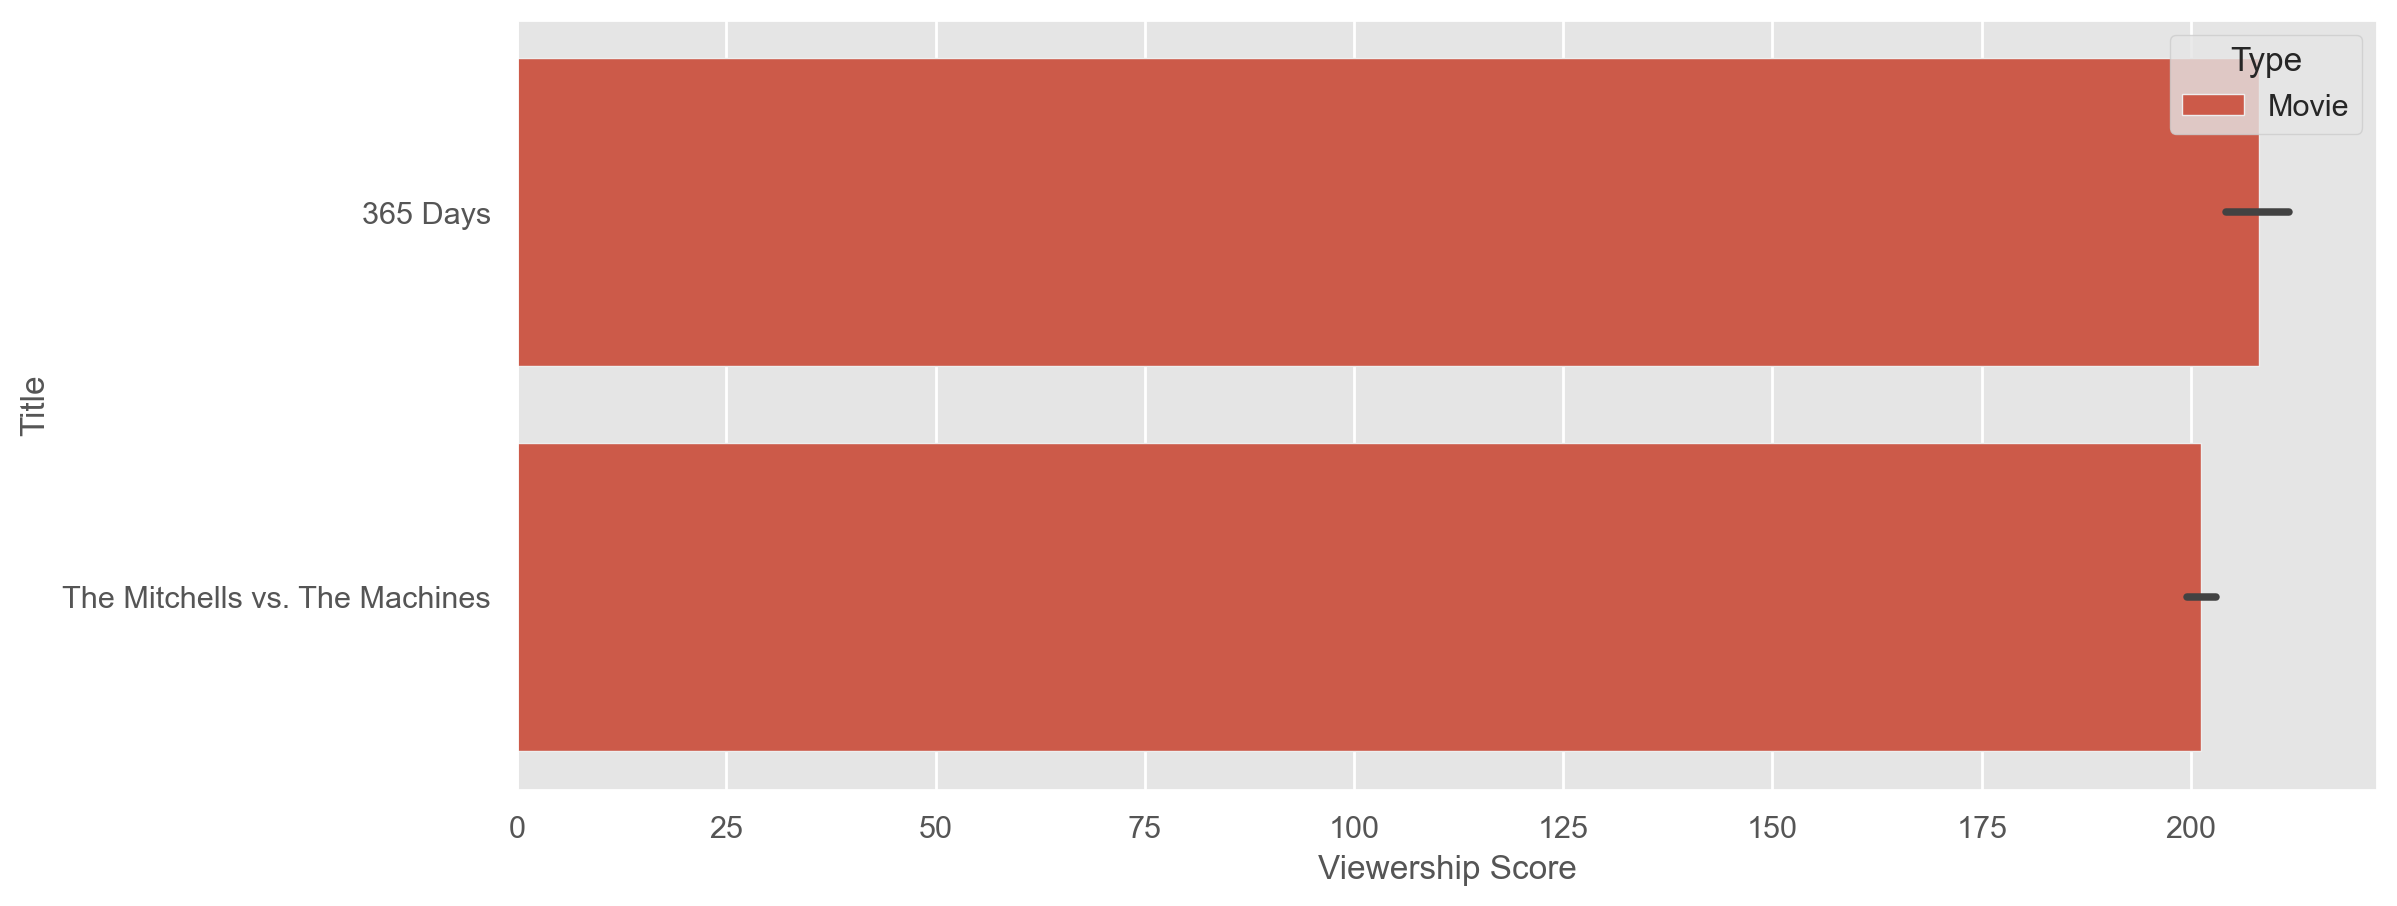

In [222]:
plt.figure(figsize = (12,5), dpi =200)
sns.barplot(data =top_10_overall, y='Title', x='Viewership Score',hue='Type')

In [223]:
netflix['As of'] = pd.to_datetime(netflix['As of'])


filtered_data = netflix[(netflix['As of'] >= '2020-01-01') & (netflix['As of'] <= '2022-12-31') & (netflix['Type'] == 'Movie')]

# Drop duplicate rows based on the 'Title' column
unique_movies = filtered_data.drop_duplicates(subset='Title')

In [224]:
unique_movies

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Release Date,Days In Top 10,Viewership Score
6465,2022-01-07,6,7,4.0,The Longest Yard,Movie,"Apr 1, 2015",3,11
36,2020-04-04,7,6,4.0,The Roommate,Movie,"Apr 1, 2020",3,13
39,2020-04-04,10,8,4.0,The Players Club,Movie,"Apr 1, 2020",2,4
28,2020-04-03,9,5,4.0,Salt,Movie,"Apr 1, 2020",1,2
3665,2021-04-02,6,5,4.0,Friends with Benefits,Movie,"Apr 1, 2021",1,5
...,...,...,...,...,...,...,...,...,...
5268,2021-09-09,9,8,4.0,Worth,Movie,"Sep 3, 2021",4,13
1933,2020-10-11,4,4,1.0,American Murder: The Family…,Movie,"Sep 30, 2020",11,102
1634,2020-09-11,5,3,4.0,#Alive,Movie,"Sep 8, 2020",3,21
1638,2020-09-11,9,5,4.0,The Social Dilemma,Movie,"Sep 9, 2020",1,2


In [225]:
top_10_overall = unique_movies.nlargest(10, 'Viewership Score') 
top_10_overall

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Release Date,Days In Top 10,Viewership Score
6578,2022-01-18,9,6,5.0,Donât Look Up,Movie,"Dec 24, 2021",25,188
4145,2021-05-20,6,5,3.0,The Mitchells vs. The Machines,Movie,"Apr 30, 2021",20,165
4579,2021-07-02,10,9,6.0,Wish Dragon,Movie,"Jun 11, 2021",21,125
1496,2020-08-28,7,4,1.0,Project Power,Movie,"Aug 14, 2020",14,124
5478,2021-09-30,9,5,4.0,Home,Movie,"May 25, 2021",21,123
6301,2021-12-22,2,2,1.0,The Unforgivable,Movie,"Dec 10, 2021",12,115
2682,2020-12-25,3,5,4.0,The Christmas Chronicles 2,Movie,"Nov 25, 2020",19,112
3596,2021-03-26,7,6,1.0,Yes Day,Movie,"Mar 12, 2021",13,111
5968,2021-11-18,9,5,1.0,Love Hard,Movie,"Nov 5, 2021",13,111
3419,2021-03-08,10,10,3.0,I Care a Lot.,Movie,"Feb 19, 2021",15,103


<Axes: xlabel='Viewership Score', ylabel='Title'>

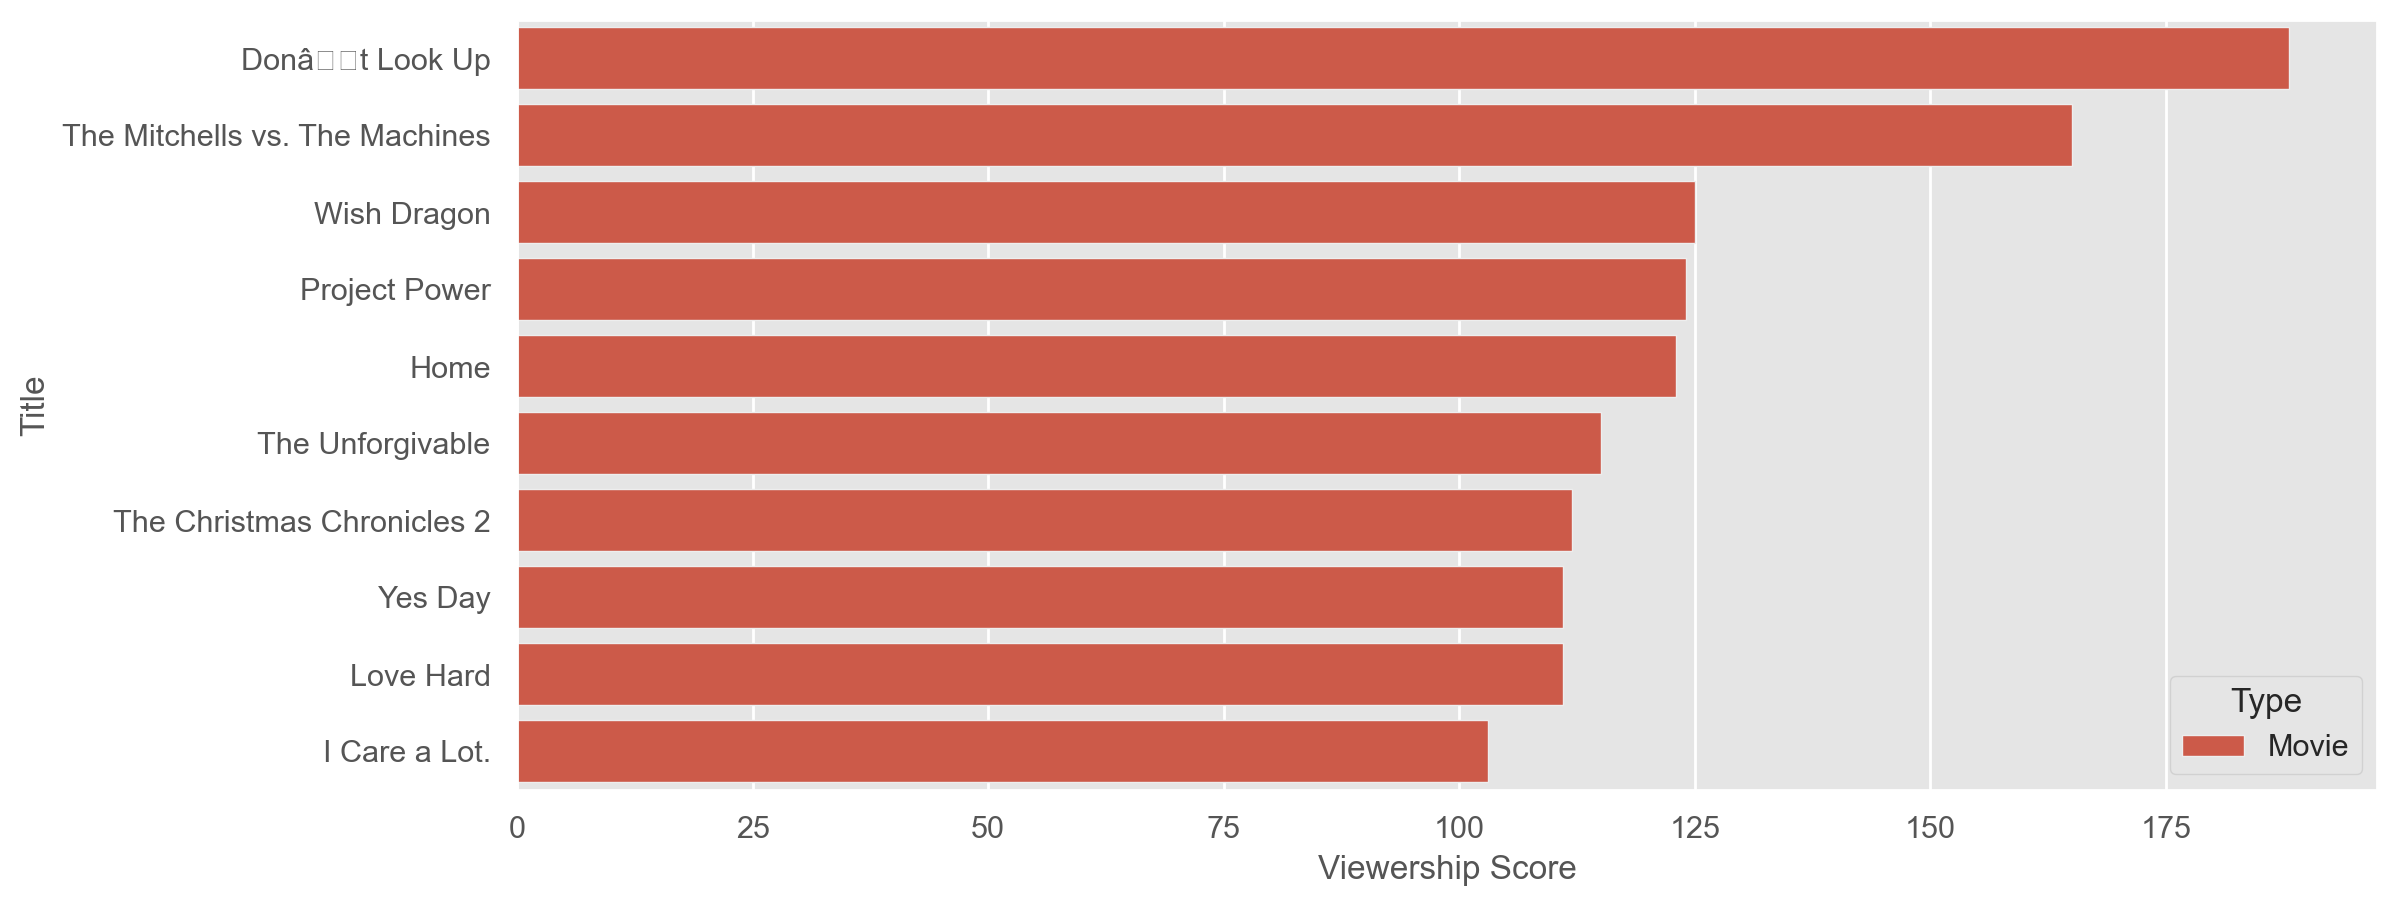

In [226]:
plt.figure(figsize = (12,5), dpi =200)
sns.barplot(data =top_10_overall, y='Title', x='Viewership Score',hue='Type')

<Axes: xlabel='Viewership Score', ylabel='Title'>

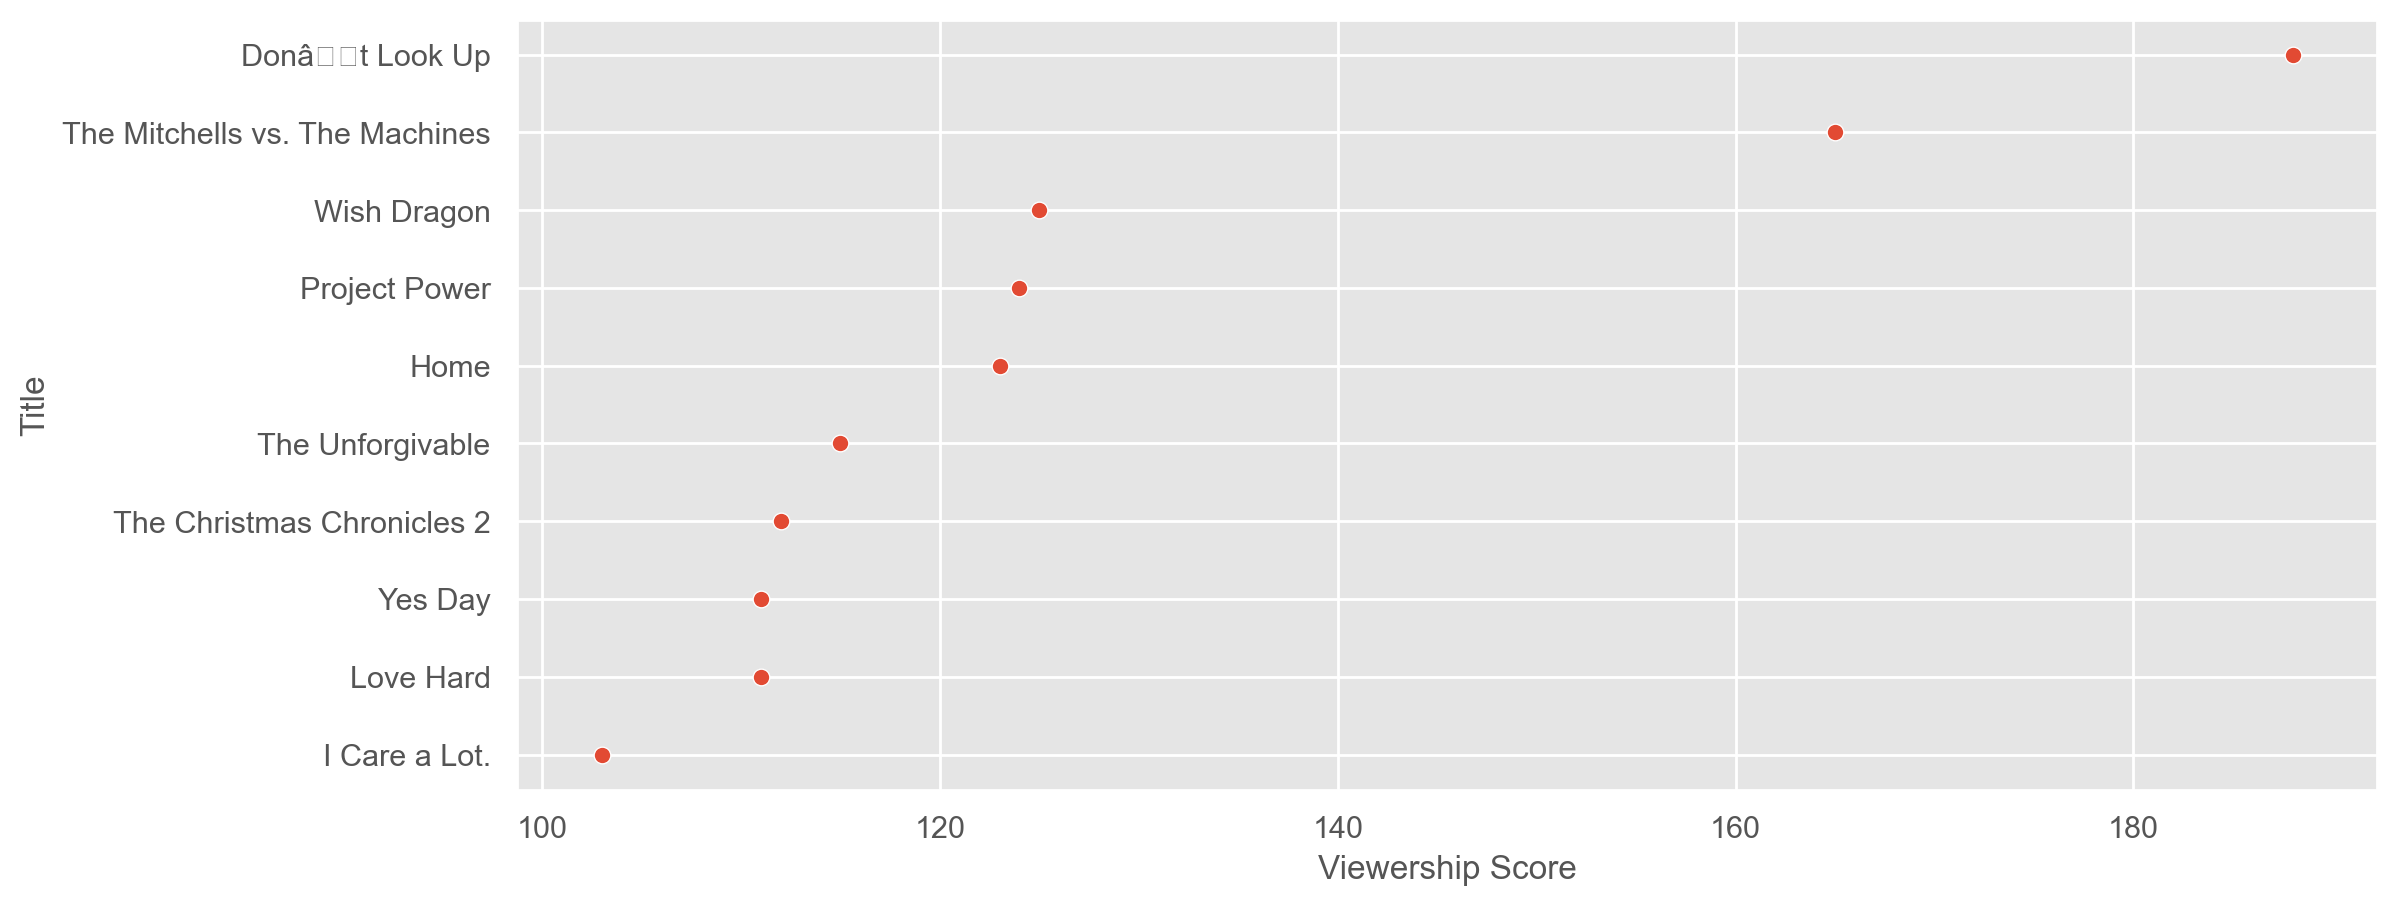

In [227]:
plt.figure(figsize = (12,5), dpi =200)
sns.scatterplot(data =top_10_overall, y='Title', x='Viewership Score')

In [228]:
netflix.corr()

,Rank,Year to Date Rank,Last Week Rank,Days In Top 10,Viewership Score
Rank,1.000000,0.799876,0.333705,0.156179,0.097769
Year to Date Rank,0.799876,1.000000,0.368920,0.180396,0.115012
Last Week Rank,0.333705,0.368920,1.000000,0.351834,0.250413
Days In Top 10,0.156179,0.180396,0.351834,1.000000,0.962414
Viewership Score,0.097769,0.115012,0.250413,0.962414,1.000000


**TASK: How many movies are in the netflix DataFrame per year?**

In [229]:
netflix['As of'] = pd.to_datetime(netflix['As of'])

#  data for the date range 2020 to 2022 and types 'Movie' or 'TV Show'
data = netflix[(netflix['As of'] >= '2020-01-01') & (netflix['As of'] <= '2022-12-31') & ((netflix['Type'] == 'Movie') | (netflix['Type'] == 'TV Show'))]

In [230]:
data['As of'].value_counts()

2022-01-07    10
2021-01-26    10
2020-06-05    10
2020-06-09    10
2020-06-08    10
              ..
2020-12-22     9
2021-10-19     9
2020-12-23     9
2021-06-10     9
2021-10-16     9
Name: As of, Length: 710, dtype: int64

In [231]:
count_movies_tv_shows = data.shape[0]
count_movies_tv_shows 

7057

In [232]:

netflix['As of'] = pd.to_datetime(netflix['As of'])

# Filter data for the date range 2020 to 2022 and types 'Movie' or 'TV Show'
data = netflix[(netflix['As of'] >= '2020-01-01') & (netflix['As of'] <= '2022-12-31') & ((netflix['Type'] == 'Movie') | (netflix['Type'] == 'TV Show'))]

# Group by 'Type' and calculate the count
count_by_type = data.groupby('Type').size()

print("Count of movies and TV shows from 2020 to 2022:")
print(count_by_type)


Count of movies and TV shows from 2020 to 2022:
Type
Movie      2611
TV Show    4446
dtype: int64


In [233]:

netflix['As of'] = pd.to_datetime(netflix['As of'])

# Filter data for the date range 2020 to 2022 and types 'Movie' or 'TV Show'
data = netflix[(netflix['As of'] >= '2020-01-01') & (netflix['As of'] <= '2022-12-31') & ((netflix['Type'] == 'Movie') | (netflix['Type'] == 'TV Show'))]

# Use value_counts to get the count of each type
count_by_type = data['Type'].value_counts()

print("Count of movies and TV shows from 2020 to 2022:")
print(count_by_type)


Count of movies and TV shows from 2020 to 2022:
TV Show    4446
Movie      2611
Name: Type, dtype: int64


#### Totally 7057 values are availbale for both TV shows and TV, Tv show alone 4446 Movies alone 2611 from 2020 to 2022

**Visualize the count of movies per year with a plot:**

In [234]:

netflix['As of'] = pd.to_datetime(netflix['As of'])

# Filter data for the date range 2020 to 2022 and types 'Movie' or 'TV Show'
data = netflix[(netflix['As of'] >= '2020-01-01') & (netflix['As of'] <= '2022-12-31') & ((netflix['Type'] == 'Movie') | (netflix['Type'] == 'TV Show'))]

# Group the counts by 'Type' and year
count_by_type_year = data.groupby(['Type', netflix['As of'].dt.year]).size().unstack(fill_value=0)

print("Count of movies and TV shows from 2020 to 2022, grouped by year:")
print(count_by_type_year)


Count of movies and TV shows from 2020 to 2022, grouped by year:
As of    2020  2021  2022
Type                     
Movie    1083  1305   223
TV Show  1642  2327   477


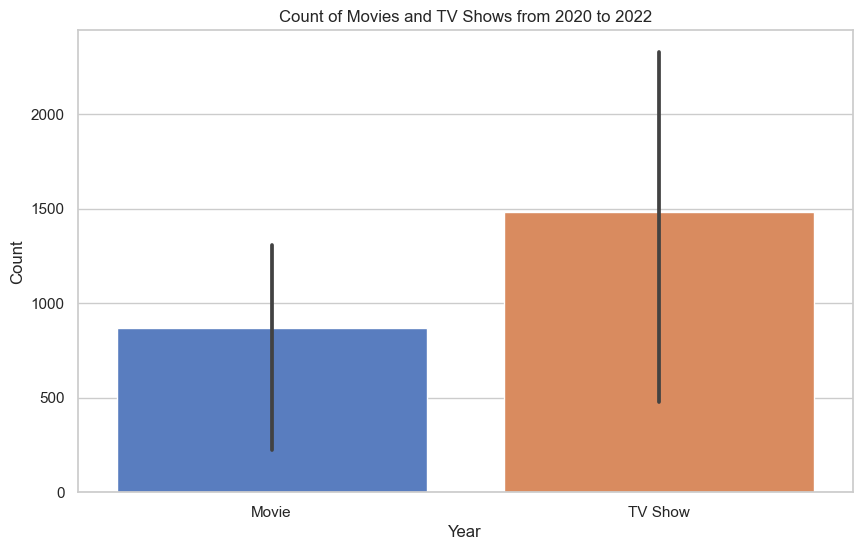

In [235]:

data = {'As of': ['Movie', 'TV Show'],
        2020: [1083, 1642],
        2021: [1305, 2327],
        2022: [223, 477]}

count_by_type_year = pd.DataFrame(data)
count_by_type_year.set_index('As of', inplace=True)

# Reset the index for easier plotting
count_by_type_year = count_by_type_year.transpose()

# Plotting with seaborn
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.barplot(data=count_by_type_year, palette="muted")
plt.title('Count of Movies and TV Shows from 2020 to 2022')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()


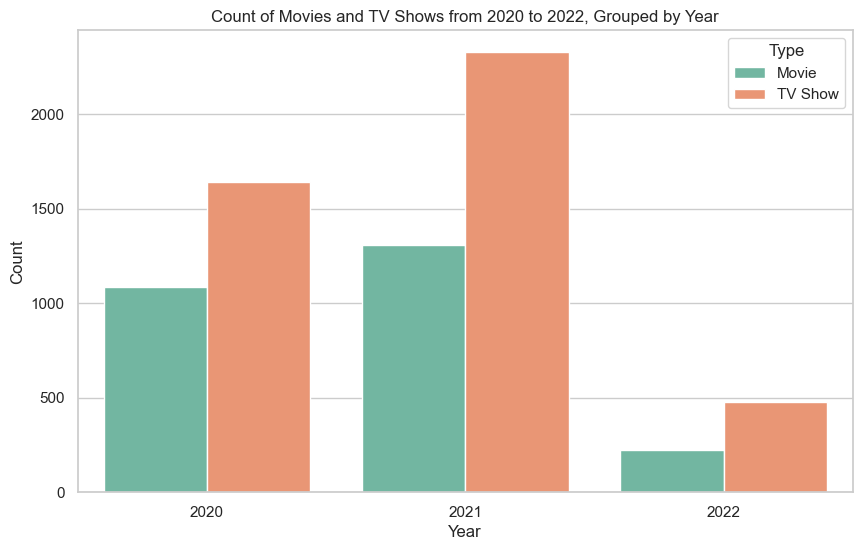

In [236]:
data = {'As of': ['Movie', 'TV Show'],
        2020: [1083, 1642],
        2021: [1305, 2327],
        2022: [223, 477]}

count_by_type_year = pd.DataFrame(data)
count_by_type_year.set_index('As of', inplace=True)

# Transpose the DataFrame
count_by_type_year = count_by_type_year.transpose()

# Melt the DataFrame for easier plotting with seaborn
melted_data = count_by_type_year.melt(value_vars=['Movie', 'TV Show'], var_name='Type', value_name='Count', ignore_index=False)

# Reset the index for grouping by 'As of' (year)
melted_data.reset_index(inplace=True)

# Plotting with seaborn
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.barplot(x='index', y='Count', hue='Type', data=melted_data, palette="Set2")
plt.title('Count of Movies and TV Shows from 2020 to 2022, Grouped by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

In [237]:

netflix['As of'] = pd.to_datetime(netflix['As of'])

# Filter data for the date range 2020 to 2022 and types 'Movie' or 'TV Show'
data = netflix[(netflix['As of'] >= '2020-01-01') & (netflix['As of'] <= '2022-12-31') & ((netflix['Type'] == 'Movie') | (netflix['Type'] == 'TV Show'))]

# Create a pivot table to get counts by 'Type' and year
count_by_type_year = data.pivot_table(index='Type', columns=netflix['As of'].dt.year, aggfunc='size', fill_value=0)

print("Count of movies and TV shows from 2020 to 2022, grouped by year:")
print(count_by_type_year)


Count of movies and TV shows from 2020 to 2022, grouped by year:
As of    2020  2021  2022
Type                     
Movie    1083  1305   223
TV Show  1642  2327   477


In [238]:

netflix['As of'] = pd.to_datetime(netflix['As of'])

# Filter data for the date range 2020 to 2022 and types 'Movie' or 'TV Show'
data = netflix[(netflix['As of'] >= '2020-01-01') & (netflix['As of'] <= '2022-12-31') & ((netflix['Type'] == 'Movie') | (netflix['Type'] == 'TV Show'))]

# Use crosstab to get counts by 'Type' and year
count_by_type_year = pd.crosstab(index=data['Type'], columns=netflix['As of'].dt.year)

print("Count of movies and TV shows from 2020 to 2022, grouped by year:")
print(count_by_type_year)


Count of movies and TV shows from 2020 to 2022, grouped by year:
As of    2020  2021  2022
Type                     
Movie    1083  1305   223
TV Show  1642  2327   477


In [239]:
count = pd.DataFrame(count_by_type)
count

,Type
TV Show,4446
Movie,2611


### movie and Tv distibution

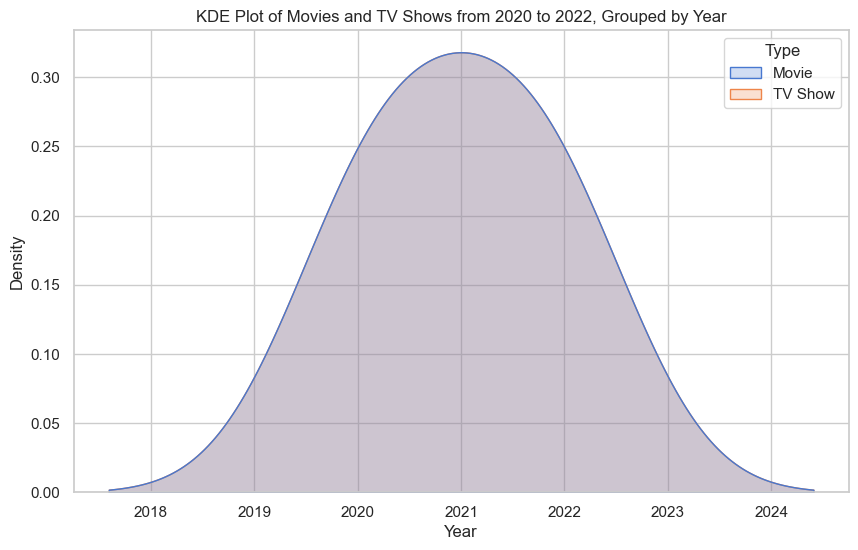

In [240]:
data = {'As of': ['Movie', 'TV Show'],
        2020: [1083, 1642],
        2021: [1305, 2327],
        2022: [223, 477]}

count_by_type_year = pd.DataFrame(data)
count_by_type_year.set_index('As of', inplace=True)

# Transpose the DataFrame
count_by_type_year = count_by_type_year.transpose()

# Melt the DataFrame for easier plotting with seaborn
melted_data = count_by_type_year.melt(value_vars=['Movie', 'TV Show'], var_name='Type', value_name='Count', ignore_index=False)

# Reset the index for grouping by 'As of' (year)
melted_data.reset_index(inplace=True)

# Plotting with seaborn using KDE plot
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.kdeplot(data=melted_data, x='index', hue='Type', fill=True, common_norm=False, palette="muted")
plt.title('KDE Plot of Movies and TV Shows from 2020 to 2022, Grouped by Year')
plt.xlabel('Year')
plt.ylabel('Density')
plt.show()


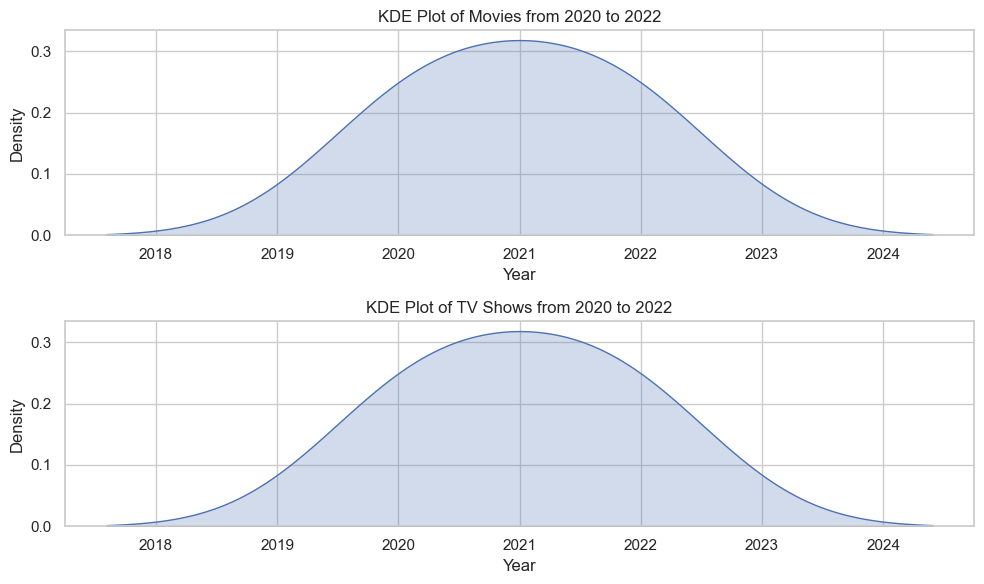

In [241]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming the data is given as a DataFrame
data = {'As of': ['Movie', 'TV Show'],
        2020: [1083, 1642],
        2021: [1305, 2327],
        2022: [223, 477]}

count_by_type_year = pd.DataFrame(data)
count_by_type_year.set_index('As of', inplace=True)

# Transpose the DataFrame
count_by_type_year = count_by_type_year.transpose()

# Melt the DataFrame for easier plotting with seaborn
melted_data = count_by_type_year.melt(value_vars=['Movie', 'TV Show'], var_name='Type', value_name='Count', ignore_index=False)

# Reset the index for grouping by 'As of' (year)
melted_data.reset_index(inplace=True)

# Plotting with seaborn using separate KDE plots for Movie and TV Show
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Create a subplot for movies
plt.subplot(2, 1, 1)
sns.kdeplot(data=melted_data[melted_data['Type'] == 'Movie'], x='index', fill=True, common_norm=False, palette="muted")
plt.title('KDE Plot of Movies from 2020 to 2022')
plt.xlabel('Year')
plt.ylabel('Density')

# Create a subplot for TV shows
plt.subplot(2, 1, 2)
sns.kdeplot(data=melted_data[melted_data['Type'] == 'TV Show'], x='index', fill=True, common_norm=False, palette="muted")
plt.title('KDE Plot of TV Shows from 2020 to 2022')
plt.xlabel('Year')
plt.ylabel('Density')

plt.tight_layout()
plt.show()


In [242]:
netflix.nlargest(10,'Viewership Score')

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Release Date,Days In Top 10,Viewership Score
6998,2022-03-01,9,5,4.0,Cocomelon,TV Show,"Jun 1, 2020",428,1474
6959,2022-02-25,10,5,4.0,Cocomelon,TV Show,"Jun 1, 2020",427,1472
6718,2022-02-01,9,5,7.0,Cocomelon,TV Show,"Jun 1, 2020",426,1471
6687,2022-01-29,8,5,8.0,Cocomelon,TV Show,"Jun 1, 2020",425,1469
6674,2022-01-28,5,6,4.0,Cocomelon,TV Show,"Jun 1, 2020",424,1466
6665,2022-01-27,6,6,4.0,Cocomelon,TV Show,"Jun 1, 2020",423,1460
6655,2022-01-26,6,7,4.0,Cocomelon,TV Show,"Jun 1, 2020",422,1455
6646,2022-01-25,7,10,4.0,Cocomelon,TV Show,"Jun 1, 2020",421,1450
6639,2022-01-24,10,5,4.0,Cocomelon,TV Show,"Jun 1, 2020",420,1446
6617,2022-01-22,8,5,10.0,Cocomelon,TV Show,"Jun 1, 2020",419,1445


In [243]:
netflix.nsmallest(10,'Viewership Score')

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Release Date,Days In Top 10,Viewership Score
99,2020-04-10,10,5,4.0,Community,TV Show,"Apr 1, 2020",1,1
3699,2021-04-05,10,5,4.0,Sniper: Ghost Shooter,Movie,"Apr 1, 2021",1,1
129,2020-04-13,10,5,4.0,The Main Event,Movie,"Apr 10, 2020",1,1
199,2020-04-20,10,5,4.0,The Green Hornet,Movie,"Apr 18, 2020",1,1
219,2020-04-22,10,5,4.0,Cooked with Cannabis,TV Show,"Apr 20, 2020",1,1
3959,2021-05-01,10,5,4.0,The Innocent,TV Show,"Apr 30, 2021",1,1
69,2020-04-07,10,5,4.0,Legacies,TV Show,"Apr 5, 2019",1,1
7079,2022-03-09,10,5,4.0,Shooter,Movie,"Aug 1, 2014",1,1
1239,2020-08-02,10,5,4.0,Moesha,TV Show,"Aug 1, 2020",1,1
4969,2021-08-10,10,5,4.0,Major Payne,Movie,"Aug 1, 2021",1,1


**TASK: How many movies have zero votes?**

In [244]:
netflix[netflix['Viewership Score'] == 1]

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Release Date,Days In Top 10,Viewership Score
99,2020-04-10,10,5,4.0,Community,TV Show,"Apr 1, 2020",1,1
3699,2021-04-05,10,5,4.0,Sniper: Ghost Shooter,Movie,"Apr 1, 2021",1,1
129,2020-04-13,10,5,4.0,The Main Event,Movie,"Apr 10, 2020",1,1
199,2020-04-20,10,5,4.0,The Green Hornet,Movie,"Apr 18, 2020",1,1
219,2020-04-22,10,5,4.0,Cooked with Cannabis,TV Show,"Apr 20, 2020",1,1
...,...,...,...,...,...,...,...,...,...
1709,2020-09-18,10,5,4.0,The Take,Movie,"Sep 16, 2020",1,1
1749,2020-09-22,10,5,4.0,The American Barbecue Showdown,TV Show,"Sep 18, 2020",1,1
1799,2020-09-27,10,5,4.0,Sneakerheads,TV Show,"Sep 25, 2020",1,1
5229,2021-09-05,10,5,4.0,Sharkdog,TV Show,"Sep 3, 2021",1,1


In [245]:
len(netflix[netflix['Viewership Score'] == 1])

98

In [246]:
single_view =netflix['Viewership Score'] == 1

In [247]:
single_view.sum()

98

In [248]:
len(netflix[netflix['Viewership Score'] == 0])

0

viewership score is not zero for any film

**Create DataFrame of only reviewed films by removing any films that have zero votes.**

In [249]:
 fan_reviewed = netflix[netflix['Viewership Score']>0]

In [250]:
fan_reviewed

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Release Date,Days In Top 10,Viewership Score
6465,2022-01-07,6,7,4.0,The Longest Yard,Movie,"Apr 1, 2015",3,11
6519,2022-01-12,10,9,9.0,The Longest Yard,Movie,"Apr 1, 2015",8,26
6486,2022-01-09,7,7,4.0,The Longest Yard,Movie,"Apr 1, 2015",5,19
6496,2022-01-10,7,7,4.0,The Longest Yard,Movie,"Apr 1, 2015",6,23
6476,2022-01-08,7,6,4.0,The Longest Yard,Movie,"Apr 1, 2015",4,15
...,...,...,...,...,...,...,...,...,...
1674,2020-09-15,5,5,4.0,Get Organized with The Home…,TV Show,"Sep 9, 2020",6,38
1665,2020-09-14,6,7,4.0,The Social Dilemma,Movie,"Sep 9, 2020",4,13
1673,2020-09-15,4,6,4.0,The Social Dilemma,Movie,"Sep 9, 2020",5,20
1708,2020-09-18,9,8,4.0,Get Organized with The Home…,TV Show,"Sep 9, 2020",9,49


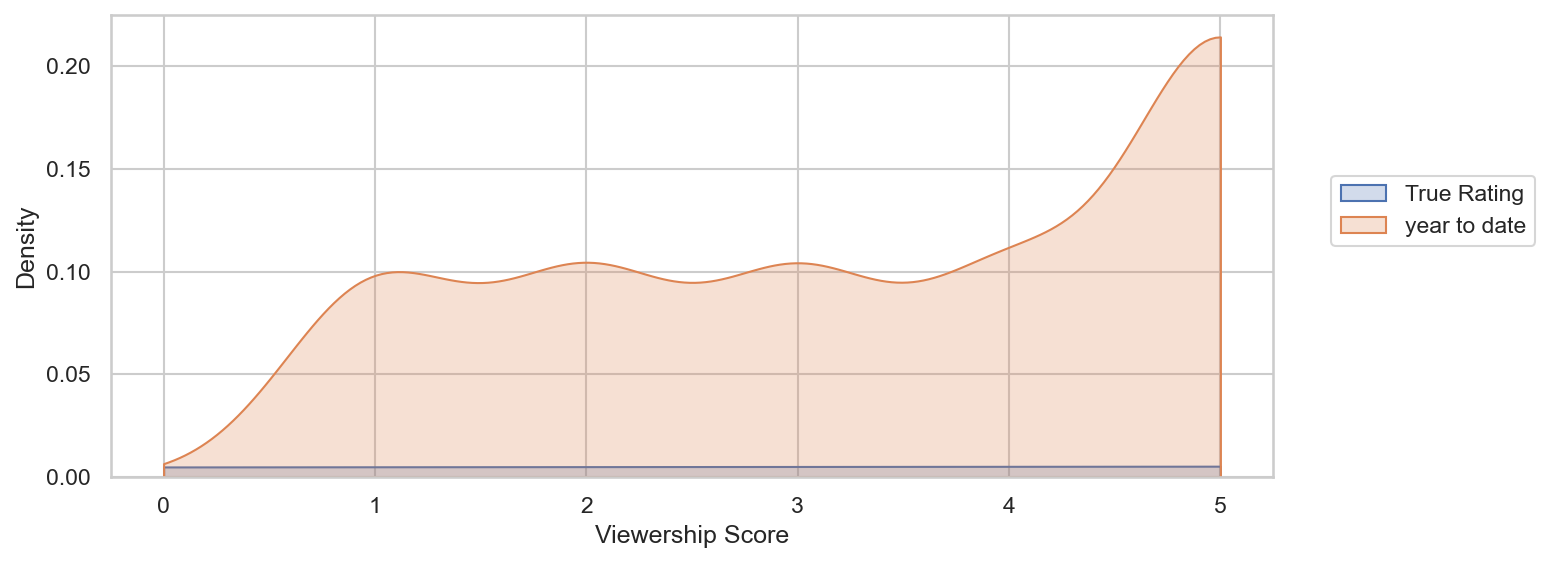

In [251]:
plt.figure(figsize=(10,4), dpi =150)
sns.kdeplot(data=fan_reviewed, x='Viewership Score',clip=[0,5], fill =True,label ='True Rating')
sns.kdeplot(data=fan_reviewed, x='Year to Date Rank',clip=[0,5], fill =True,label = 'year to date')

plt.legend(loc=(1.05,0.5))
plt.legend(loc=(1.05,0.5))

In [252]:
data.columns

AttributeError: 'dict' object has no attribute 'columns'

In [253]:
data

{'As of': ['Movie', 'TV Show'],
 2020: [1083, 1642],
 2021: [1305, 2327],
 2022: [223, 477]}

<Axes: xlabel='Viewership Score', ylabel='Count'>

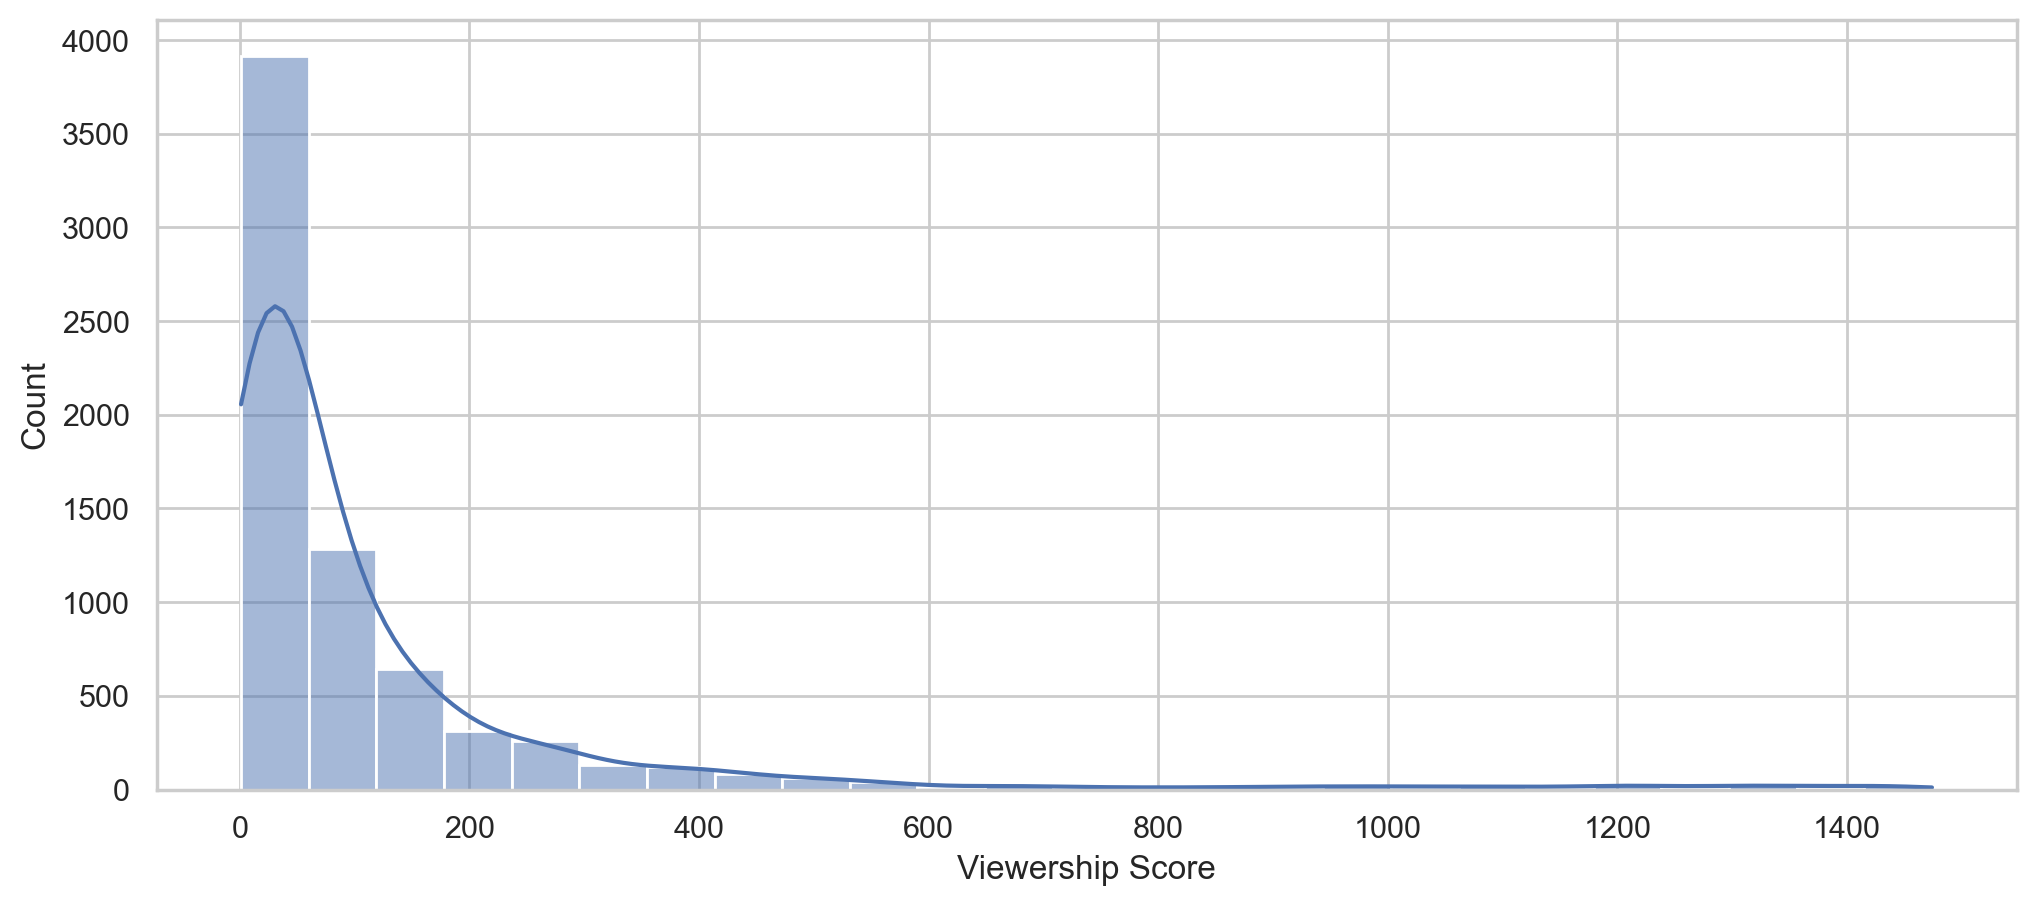

In [254]:
plt.figure(figsize = (12,5), dpi =200)
sns.histplot(data=netflix,x='Viewership Score',kde=True,bins=25)